# Lecture 12: Solutions from Lecture Exercises 

In [1]:
import ripser # This is in the scikit-tda package
from persim import plot_diagrams # Also in scikit-tda


import teaspoon.MakeData.PointCloud as gPC
import teaspoon.TDA.Draw as Draw

# Standard imports 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial import distance_matrix
import plotly.express as px
import plotly.graph_objects as go


%matplotlib inline

## Homology of a sphere

<div style="border:2px solid #e74c3c; border-radius:8px; padding:1em; background:#fff6f6;color:#000000; width:80%">
<span style="color:#e74c3c; font-weight:bold;">Q:</span> 
<ul>
<li> What is the homology of the sphere?</li>
<li> Compute the persistence diagram for the sphere point cloud. Does this fit with what you said above?</li>
<li> Increase the number of points in the sphere to 400 and compute its persistence diagram. Do the same for 100 points and 500 points (although you might need to be patient, my laptop took about 30 seconds for that last one). What changes in the diagram??</li>
</ul>
</div>

The homology of a sphere is: $\beta_0 = 1$, $\beta_1 = 0$, $\beta_2 = 1$.


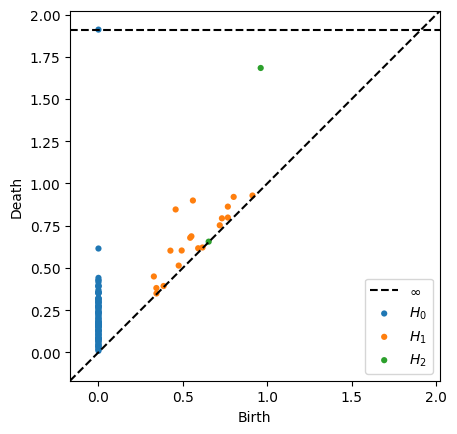

In [2]:

N = 100 #<--- mess with this number to change the number of points
P_sphere = gPC.Sphere(N)
output = ripser.ripser(P_sphere, maxdim=2)
plot_diagrams(output['dgms'], show=True)

Notice that this diagram has 

- an infinite class for the 0-dimensional connected component (fits with $\beta_0 = 1$)
- no prominent 1-dimensional classes, meaning nothing far from the diagonal
- a prominent 2-dimensional class, with fits with $\beta_2 = 1$


## Torus

<div style="border:2px solid #e74c3c; border-radius:8px; padding:1em; background:#fff6f6;color:#000000; width:80%">
<span style="color:#e74c3c; font-weight:bold;">Q:</span> 
<ul>
<li> What is the homology of the torus?</li>
<li> Compute the persistence diagram for the torus point cloud. Does this fit with what you said above? <em>Hint: If it doesn't, try increasing the number of points in the point cloud.</em></li>
<li> What is different between this diagram and the sphere diagram?</li>
</ul>
</div>


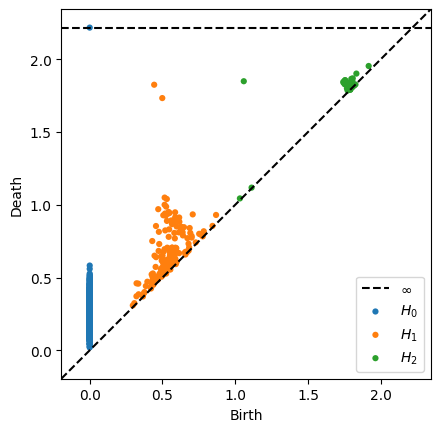

In [11]:
N = 500 #<--- mess with this number to change the number of points
P_torus = gPC.Torus(N)
output = ripser.ripser(P_torus, maxdim=2)
plot_diagrams(output['dgms'])



Homology of a torus: $\beta_0 = 1$, $\beta_1 = 2$, $\beta_2 = 1$


For the number of points I gave you, you won't really see the homology of the torus show up in the persistence diagram. Increase to 300-400 and it will be obvious. Notice that this diagram has 
- an infinite class for the 0-dimensional connected component (fits with beta_0 = 1)
- two 1-dimensional classes far from the diagonal
- one 2-dimensional point far from the diagonal, with fits with $\beta_2 = 1$


## Persistence for similar point clouds 
<div style="border:2px solid #e74c3c; border-radius:8px; padding:1em; background:#fff6f6;color:#000000; width:80%">
<span style="color:#e74c3c; font-weight:bold;">Q:</span> 
<ul>
<li> What do you notice about the two persistence diagrams for the annuli?</li>
<li> Overlay the 1-dimensional torus diagram from earlier. What do you see? Which are more similar: the two annuli diagrams, or an annulus and the torus? </li>
</ul>
</div>

In [4]:
P1 = gPC.Annulus(200,1,2)
P2 = gPC.Annulus(200,1,2)
P_Torus = gPC.Torus(400)

In [5]:
Dgms1 = ripser.ripser(P1)['dgms']
Dgms2 = ripser.ripser(P2)['dgms']
DgmsT = ripser.ripser(P_Torus)['dgms']

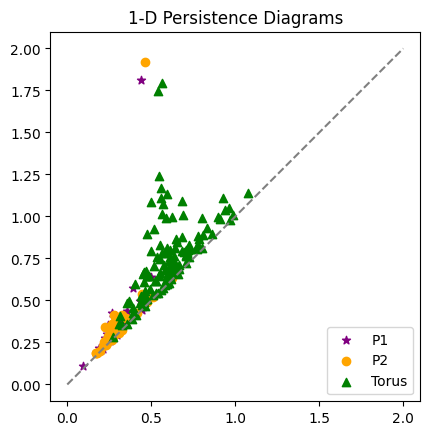

In [6]:
plt.plot([0,2],[0,2], color='gray', linestyle='--')
plt.scatter(Dgms1[1][:,0], Dgms1[1][:,1], marker = '*', color = 'purple', label = 'P1')
plt.scatter(Dgms2[1][:,0], Dgms2[1][:,1], color = 'orange', label = 'P2')
plt.scatter(DgmsT[1][:,0], DgmsT[1][:,1], color = 'green', marker = '^', label = 'Torus')
plt.axis('square')
plt.title('1-D Persistence Diagrams')
plt.legend();

## Changing the radius on the annuli 

<div style="border:2px solid #e74c3c; border-radius:8px; padding:1em; background:#fff6f6;color:#000000; width:80%">
<span style="color:#e74c3c; font-weight:bold;">Q:</span> 
<ul>
<li> What changes in the persistence diagram when you change the inside radius <em>r</em>?</li>
<li> What changes in the persistence diagram when you change the outside radius <em>R</en></li>
</ul>
</div>

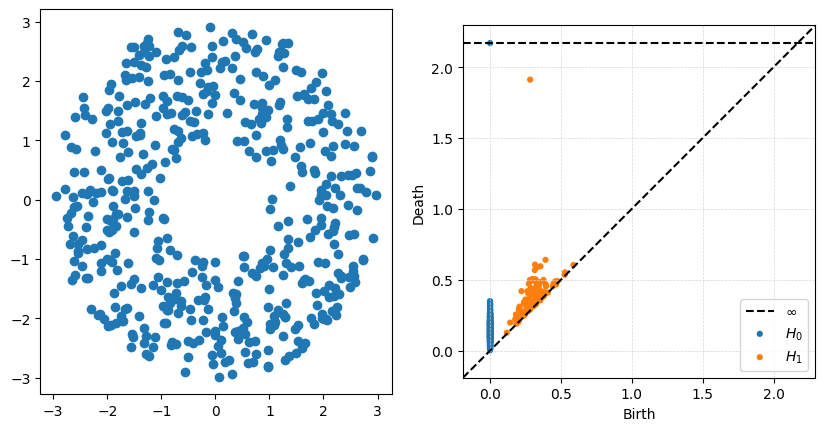

In [7]:
P = gPC.Annulus(500,r = 1, R = 3)
Dgms = ripser.ripser(P)['dgms']
fig, axs = plt.subplots(1,2, figsize = (10,5))
plt.sca(axs[0])
Draw.drawPtCloud(P)
plt.sca(axs[1])
plot_diagrams(Dgms)
axs[1].grid(True, linestyle='--', linewidth=0.5, color='lightgray', alpha=0.9)


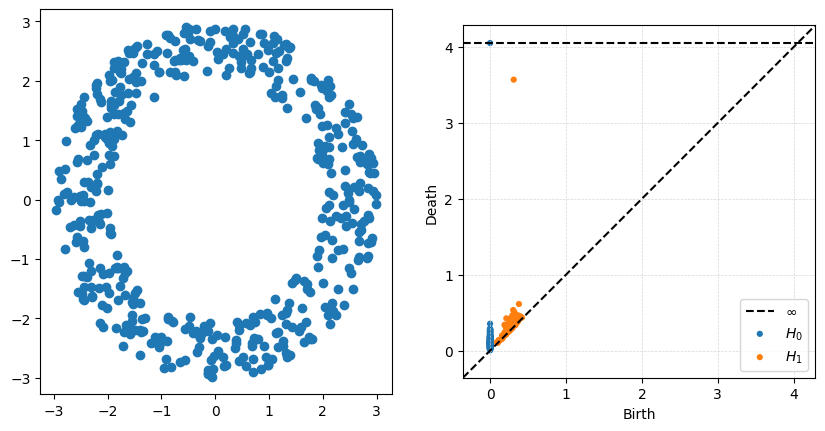

In [8]:
P = gPC.Annulus(500,r = 2, R = 3)
Dgms = ripser.ripser(P)['dgms']
fig, axs = plt.subplots(1,2, figsize = (10,5))
plt.sca(axs[0])
Draw.drawPtCloud(P)
plt.sca(axs[1])
plot_diagrams(Dgms)
axs[1].grid(True, linestyle='--', linewidth=0.5, color='lightgray', alpha=0.9)

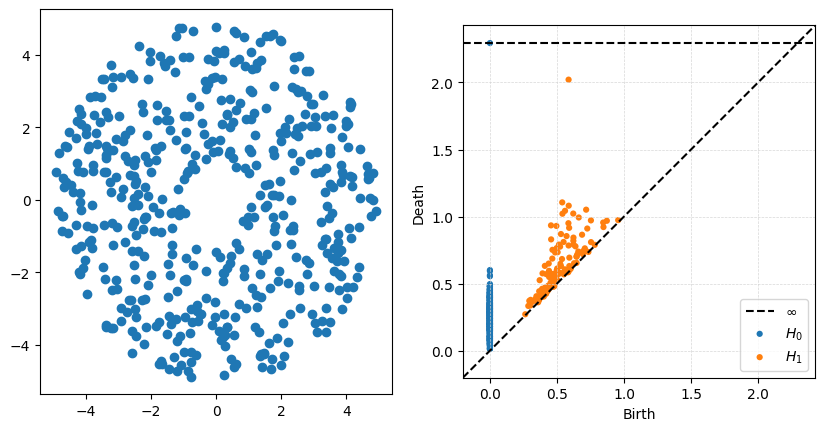

In [9]:
P = gPC.Annulus(500,r = 1, R = 5)
Dgms = ripser.ripser(P)['dgms']
fig, axs = plt.subplots(1,2, figsize = (10,5))
plt.sca(axs[0])
Draw.drawPtCloud(P)
plt.sca(axs[1])
plot_diagrams(Dgms)
axs[1].grid(True, linestyle='--', linewidth=0.5, color='lightgray', alpha=0.9)

The big thing to notice with this example is that the ouside radius does very little to change the high-persistence point. What is really being measured is the size of the inside hole, controlled in this case by $r$.